Plain Backtracking
Plain Solution: {'AP': 'Red', 'AR': 'Red', 'AS': 'Green', 'BR': 'Red', 'CG': 'Red', 'GA': 'Red', 'GJ': 'Red', 'HR': 'Red', 'HP': 'Green', 'JH': 'Green', 'KA': 'Green', 'KL': 'Red', 'MP': 'Green', 'MH': 'Blue', 'MN': 'Red', 'ML': 'Red', 'MZ': 'Blue', 'NL': 'Blue', 'OD': 'Blue', 'PB': 'Blue', 'RJ': 'Yellow', 'SK': 'Red', 'TN': 'Blue', 'TS': 'Yellow', 'TR': 'Yellow', 'UP': 'Blue', 'UK': 'Yellow', 'WB': 'Yellow', 'JK': 'Red'}
Plain Steps: 30


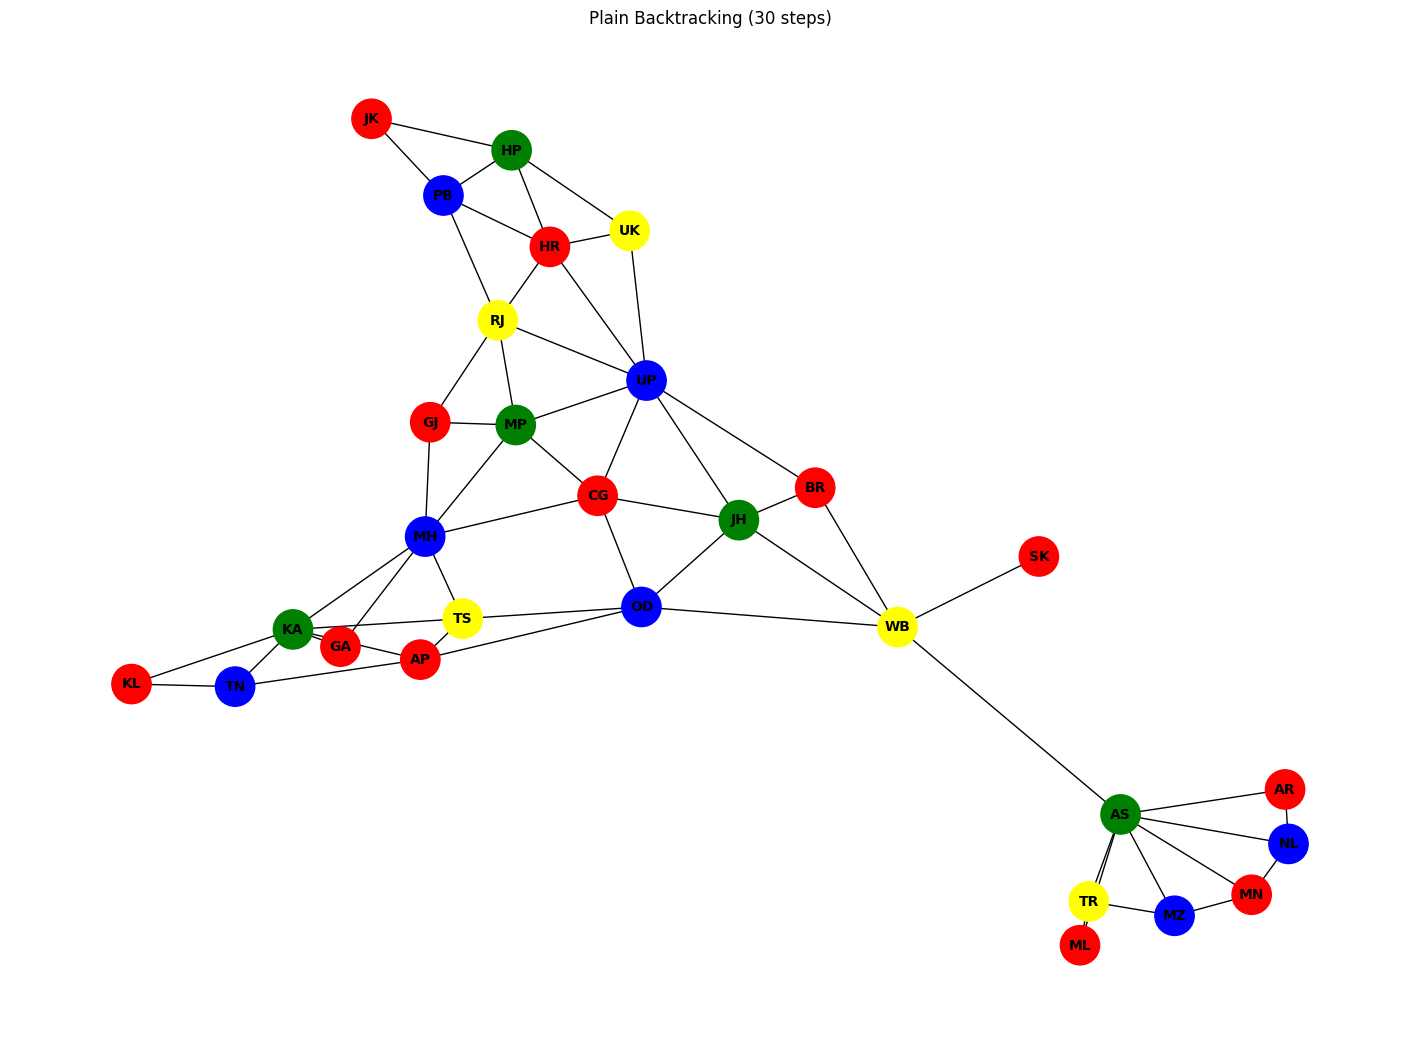


Backtracking with MRV + LCV
MRV Selected: AP
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: KA
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: TN
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: KL
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: TS
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: MH
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: GA
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: OD
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: CG
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: JH
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: MP
LCV Orders: ['Green', 'Blue', 'Yellow', 'Red']
MRV Selected: UP
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: BR
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: RJ
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: WB
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selecte

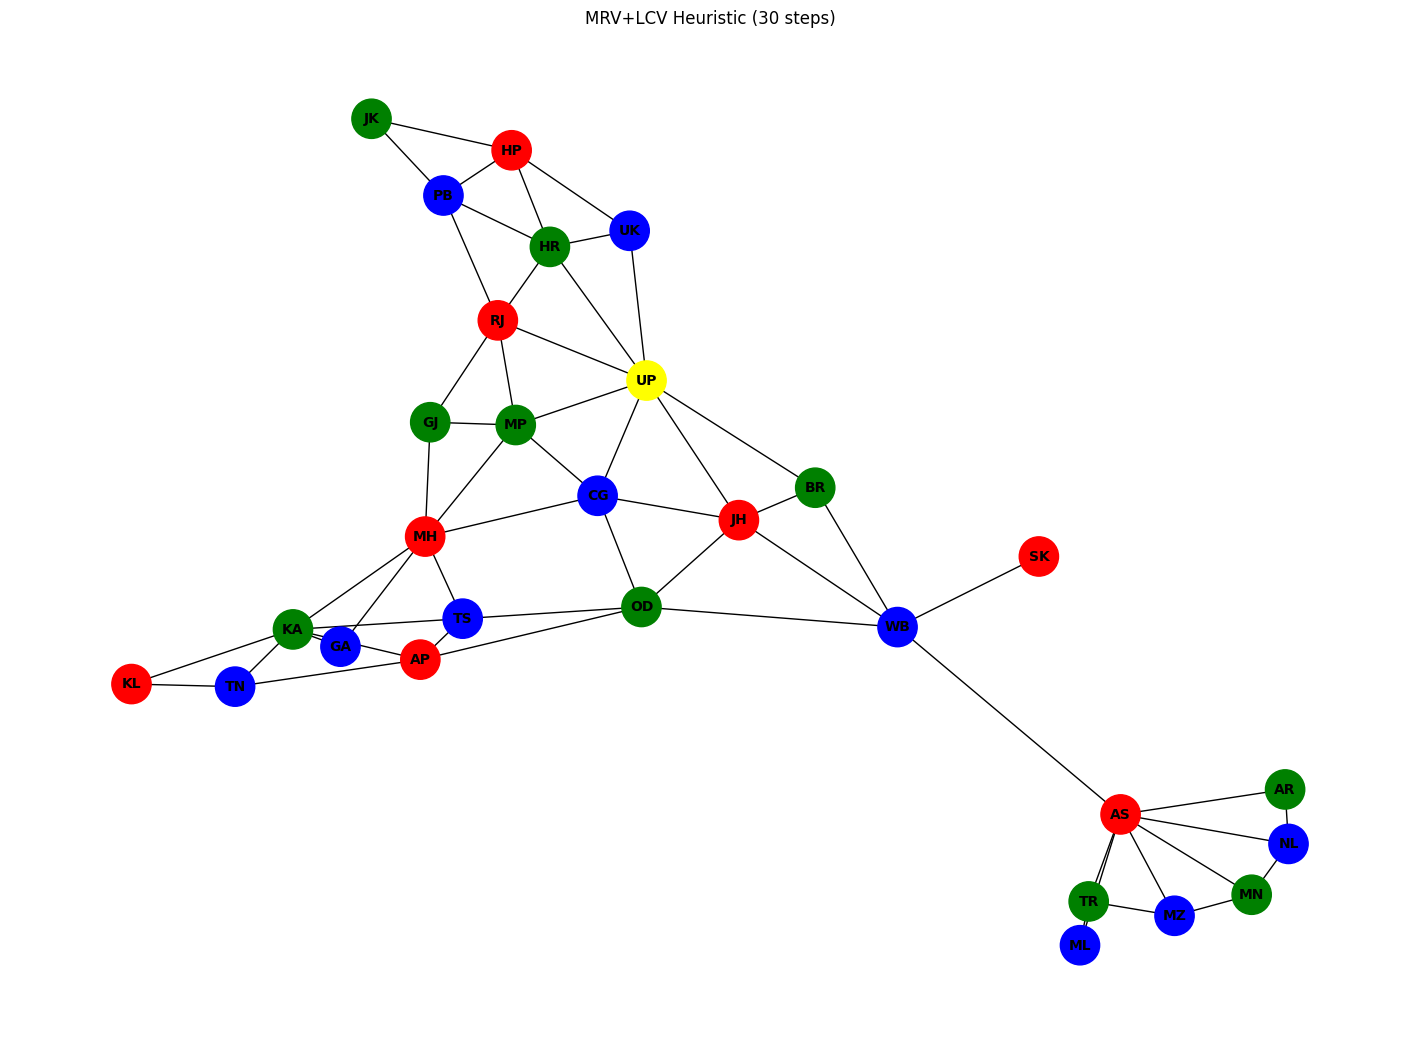


Backtracking + MRV+LCV + AC-3
MRV Selected: AP
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: KA
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: TN
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: KL
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: TS
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: MH
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: GA
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: OD
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: CG
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: JH
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: MP
LCV Orders: ['Green', 'Blue', 'Yellow', 'Red']
MRV Selected: UP
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: BR
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: RJ
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selected: WB
LCV Orders: ['Red', 'Green', 'Blue', 'Yellow']
MRV Selec

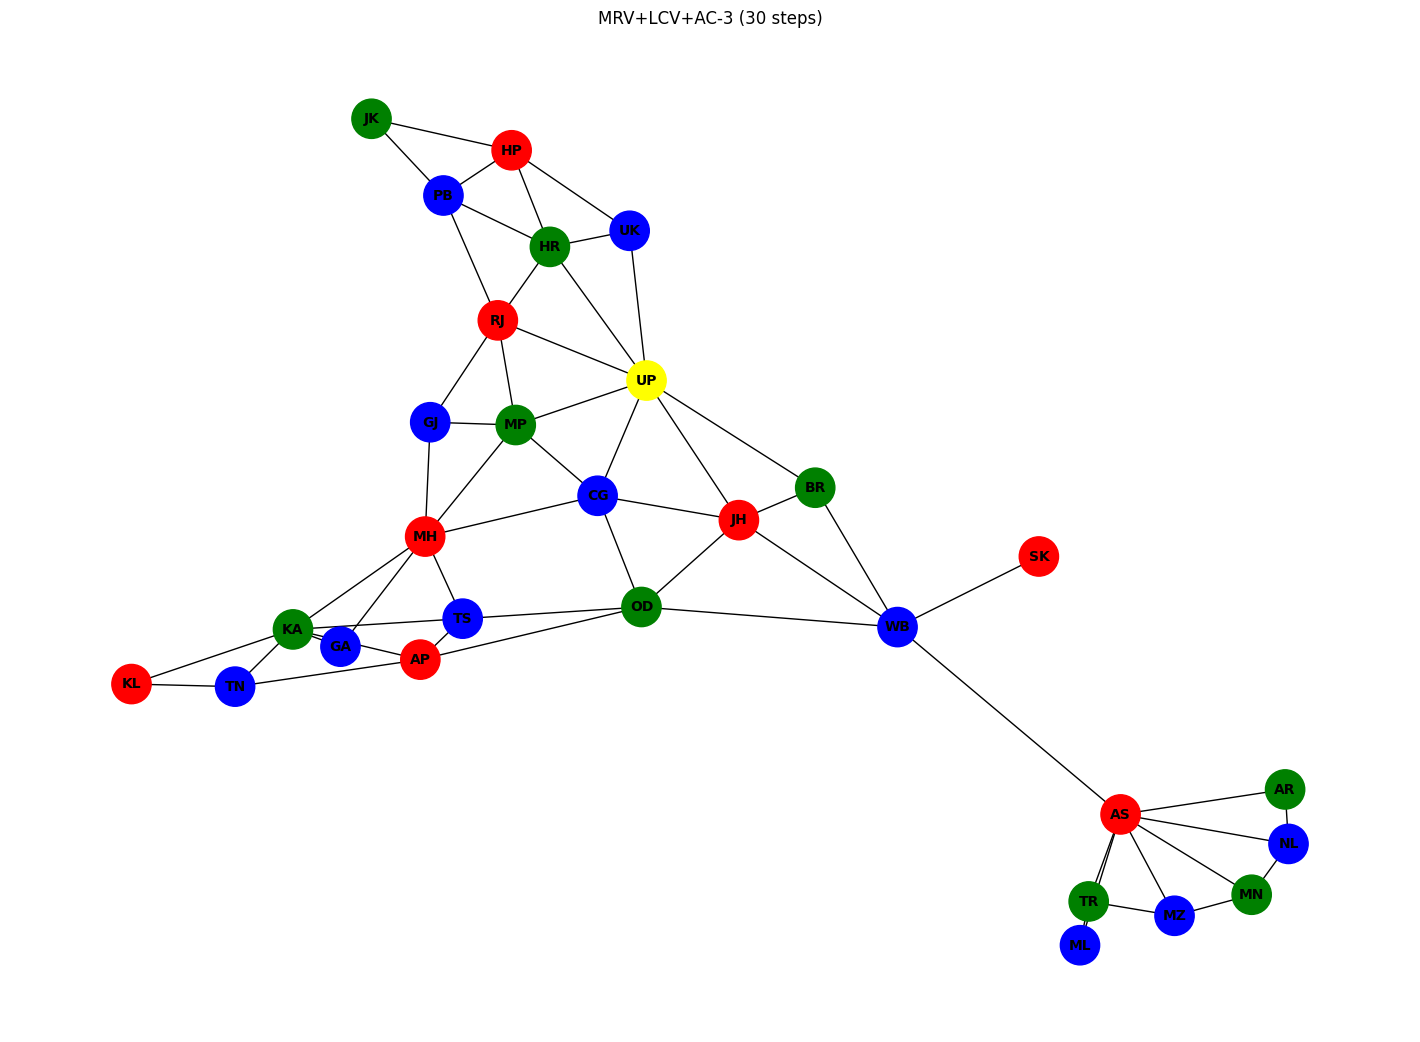


Comparison Table
| Algorithm         | Steps Explored |
|-------------------|----------------|
| Plain Backtracking| 30           |
| MRV+LCV Heuristics| 30           |
| MRV+LCV+AC-3      | 30           |


In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# States and abbreviations
variables = [
    'AP','AR','AS','BR','CG','GA','GJ','HR','HP','JH',
    'KA','KL','MP','MH','MN','ML','MZ','NL','OD','PB',
    'RJ','SK','TN','TS','TR','UP','UK','WB','JK'
]
colors = ['Red', 'Green', 'Blue', 'Yellow']

# Adjacency list (simplified map)
neighbors = {
    'AP': ['TS', 'OD', 'TN', 'KA'],
    'AR': ['AS', 'NL'],
    'AS': ['AR', 'NL', 'ML', 'TR', 'MZ', 'MN', 'WB'],
    'BR': ['UP', 'JH', 'WB'],
    'CG': ['UP', 'JH', 'OD', 'MH'],
    'GA': ['MH', 'KA'],
    'GJ': ['MH', 'RJ'],
    'HR': ['PB', 'HP', 'UK', 'RJ'],
    'HP': ['JK', 'PB', 'HR', 'UK'],
    'JH': ['BR', 'UP', 'CG', 'OD', 'WB'],
    'KA': ['MH', 'AP', 'TS', 'TN', 'KL', 'GA'],
    'KL': ['KA', 'TN'],
    'MP': ['RJ', 'UP', 'CG', 'MH', 'GJ'],
    'MH': ['GJ', 'MP', 'CG', 'TS', 'KA', 'GA'],
    'MN': ['AS', 'MZ', 'NL'],
    'ML': ['AS', 'TR'],
    'MZ': ['AS', 'MN', 'TR'],
    'NL': ['AR', 'AS', 'MN'],
    'OD': ['WB', 'JH', 'CG', 'AP', 'TS'],
    'PB': ['JK', 'HP', 'HR', 'RJ'],
    'RJ': ['PB', 'HR', 'MP', 'GJ', 'UP'],
    'SK': ['WB'],
    'TN': ['AP', 'KA', 'KL'],
    'TS': ['MH', 'KA', 'AP', 'OD'],
    'TR': ['AS', 'ML', 'MZ'],
    'UP': ['UK', 'HR', 'RJ', 'MP', 'CG', 'JH', 'BR'],
    'UK': ['HP', 'HR', 'UP'],
    'WB': ['BR', 'JH', 'OD', 'AS', 'SK'],
    'JK': ['HP', 'PB']
}

def is_valid(assignment, var, value):
    for n in neighbors[var]:
        if n in assignment and assignment[n] == value:
            return False
    return True

plain_steps = 0
def backtrack_plain(assignment):
    global plain_steps
    plain_steps += 1
    if len(assignment) == len(variables):
        return assignment
    for var in variables:
        if var not in assignment:
            break
    for value in colors:
        if is_valid(assignment, var, value):
            assignment[var] = value
            result = backtrack_plain(assignment)
            if result:
                return result
            del assignment[var]
    return None

def select_unassigned_var(assignment):
    unassigned = [v for v in variables if v not in assignment]
    # MRV: select var with fewest valid colors
    return min(unassigned, key=lambda var: sum(is_valid(assignment, var, c) for c in colors))

def order_domain_values(var, assignment):
    # LCV: prefer colors that least constrain neighbors
    def conflicts(val):
        return sum(
            1 for n in neighbors[var]
            if n not in assignment and not is_valid({**assignment, var: val}, n, val)
        )
    return sorted(colors, key=conflicts)


heuristic_steps = 0
def backtrack_heuristic(assignment):
    global heuristic_steps
    heuristic_steps += 1
    if len(assignment) == len(variables):
        return assignment
    var = select_unassigned_var(assignment)
    print(f"MRV Selected: {var}")
    color_order = order_domain_values(var, assignment)
    print(f"LCV Orders: {color_order}")
    for value in color_order:
        if is_valid(assignment, var, value):
            assignment[var] = value
            result = backtrack_heuristic(assignment)
            if result:
                return result
            del assignment[var]
    return None

from collections import deque

def ac3(domains):
    queue = deque()
    for var in variables:
        for neighbor in neighbors[var]:
            queue.append((var, neighbor))
    while queue:
        (xi, xj) = queue.popleft()
        if revise(domains, xi, xj):
            if not domains[xi]:
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def revise(domains, xi, xj):
    revised = False
    for x in set(domains[xi]):
        if not any(y != x for y in domains[xj]):
            domains[xi].remove(x)
            revised = True
    return revised


ac3_steps = 0
def backtrack_ac3(assignment, domains):
    global ac3_steps
    ac3_steps += 1
    if len(assignment) == len(variables):
        return assignment
    var = select_unassigned_var(assignment)
    print(f"MRV Selected: {var}")
    ordered_values = order_domain_values(var, assignment)
    print(f"LCV Orders: {ordered_values}")
    for value in ordered_values:
        if is_valid(assignment, var, value):
            local_domains = {v: list(domains[v]) for v in domains}
            local_domains[var] = [value]
            if ac3(local_domains):
                assignment[var] = value
                result = backtrack_ac3(assignment, local_domains)
                if result:
                    return result
                del assignment[var]
    return None


def visualize_coloring(solution, title):
    G = nx.Graph()
    for var in variables:
        G.add_node(var)
    for var, neighs in neighbors.items():
        for n in neighs:
            G.add_edge(var, n)
    # positions can be chosen by a layout like spring_layout
    pos = nx.spring_layout(G, seed=42)
    node_colors = [solution.get(node, "white") for node in G.nodes()]
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=800,
        font_size=10,
        font_weight="bold",
        edge_color="black"
    )
    plt.title(title)
    plt.show()


if __name__ == "__main__":
    print("Plain Backtracking")
    plain_assignment = {}
    plain_steps = 0
    plain_solution = backtrack_plain(plain_assignment)
    print("Plain Solution:", plain_solution)
    print("Plain Steps:", plain_steps)
    visualize_coloring(plain_solution, f"Plain Backtracking ({plain_steps} steps)")

    print("\nBacktracking with MRV + LCV")
    heuristic_assignment = {}
    heuristic_steps = 0
    heuristic_solution = backtrack_heuristic(heuristic_assignment)
    print("Heuristic Solution:", heuristic_solution)
    print("Heuristic Steps:", heuristic_steps)
    visualize_coloring(heuristic_solution, f"MRV+LCV Heuristic ({heuristic_steps} steps)")

    print("\nBacktracking + MRV+LCV + AC-3")
    ac3_assignment = {}
    ac3_steps = 0
    init_domains = {v: list(colors) for v in variables}
    ac3_solution = backtrack_ac3(ac3_assignment, init_domains)
    print("AC-3 Solution:", ac3_solution)
    print("AC-3 Steps:", ac3_steps)
    visualize_coloring(ac3_solution, f"MRV+LCV+AC-3 ({ac3_steps} steps)")

    # Output comparison table
    print("\nComparison Table")
    print("| Algorithm         | Steps Explored |")
    print("|-------------------|----------------|")
    print(f"| Plain Backtracking| {plain_steps}           |")
    print(f"| MRV+LCV Heuristics| {heuristic_steps}           |")
    print(f"| MRV+LCV+AC-3      | {ac3_steps}           |")
